# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,United Kingdom,France,Germany,Turkey,Russia,Iran,Brazil,...,Burundi,Seychelles,Suriname,MS Zaandam,Mauritania,Papua New Guinea,Bhutan,Western Sahara,Yemen,Comoros
2020-04-26,965785,207634,197675,154037,162220,157770,110130,80949,90481,63100,...,11,11,10,9,7,8,7,6,1,0
2020-04-27,988197,209465,199414,158348,165963,158758,112261,87147,91472,67446,...,11,11,10,9,7,8,7,6,1,0
2020-04-28,1012582,210773,201505,162350,169053,159912,114653,93558,92584,73235,...,11,11,10,9,7,8,7,6,1,0
2020-04-29,1039909,212917,203591,166441,166543,161539,117589,99399,93657,79685,...,11,11,10,9,8,8,7,6,6,0
2020-04-30,1069424,213435,205463,172481,167299,163009,120204,106498,94640,87187,...,11,11,10,9,8,8,7,6,6,1


'chg in cases'

Country/Region,US,Spain,Italy,United Kingdom,France,Germany,Turkey,Russia,Iran,Brazil,...,Burundi,Seychelles,Suriname,MS Zaandam,Mauritania,Papua New Guinea,Bhutan,Western Sahara,Yemen,Comoros
2020-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-27,22412.0,1831.0,1739.0,4311.0,3743.0,988.0,2131.0,6198.0,991.0,4346.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-28,24385.0,1308.0,2091.0,4002.0,3090.0,1154.0,2392.0,6411.0,1112.0,5789.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-29,27327.0,2144.0,2086.0,4091.0,-2510.0,1627.0,2936.0,5841.0,1073.0,6450.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
2020-04-30,29515.0,518.0,1872.0,6040.0,756.0,1470.0,2615.0,7099.0,983.0,7502.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


'deaths'

Country/Region,US,Italy,United Kingdom,Spain,France,Belgium,Germany,Iran,Brazil,Netherlands,...,Timor-Leste,Saint Lucia,Central African Republic,Tajikistan,Nepal,Comoros,Bhutan,Saint Kitts and Nevis,Rwanda,Sao Tome and Principe
2020-04-26,54881,26644,24117,23190,22890,7094,5976,5710,4286,4491,...,0,0,0,0,0,0,0,0,0,0
2020-04-27,56259,26977,24458,23521,23327,7207,6126,5806,4603,4534,...,0,0,0,0,0,0,0,0,0,0
2020-04-28,58355,27359,25369,23822,23694,7331,6314,5877,5083,4582,...,0,0,0,0,0,0,0,0,0,0
2020-04-29,60967,27682,26166,24275,24121,7501,6467,5957,5513,4727,...,0,0,0,0,0,0,0,0,0,0
2020-04-30,62996,27967,26842,24543,24410,7594,6623,6028,6006,4811,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,United Kingdom,Spain,France,Belgium,Germany,Iran,Brazil,Netherlands,...,Timor-Leste,Saint Lucia,Central African Republic,Tajikistan,Nepal,Comoros,Bhutan,Saint Kitts and Nevis,Rwanda,Sao Tome and Principe
2020-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-27,1378.0,333.0,341.0,331.0,437.0,113.0,150.0,96.0,317.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-28,2096.0,382.0,911.0,301.0,367.0,124.0,188.0,71.0,480.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-29,2612.0,323.0,797.0,453.0,427.0,170.0,153.0,80.0,430.0,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-30,2029.0,285.0,676.0,268.0,289.0,93.0,156.0,71.0,493.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# plot globals?


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,United Kingdom,France,Germany,Turkey,Russia,Iran,Brazil,...,Burundi,Seychelles,Suriname,MS Zaandam,Mauritania,Papua New Guinea,Bhutan,Western Sahara,Yemen,Comoros
2020-04-26,5.68,11.17,13.48,15.66,14.11,3.79,2.55,0.92,6.31,6.79,...,9.09,0.0,10.0,22.22,14.29,0.0,0.0,0.0,0.00,0.0
2020-04-27,5.69,11.23,13.53,15.45,14.06,3.86,2.58,0.91,6.35,6.82,...,9.09,0.0,10.0,22.22,14.29,0.0,0.0,0.0,0.00,0.0
2020-04-28,5.76,11.30,13.58,15.63,14.02,3.95,2.61,0.93,6.35,6.94,...,9.09,0.0,10.0,22.22,14.29,0.0,0.0,0.0,0.00,0.0
2020-04-29,5.86,11.40,13.60,15.72,14.48,4.00,2.62,0.98,6.36,6.92,...,9.09,0.0,10.0,22.22,12.50,0.0,0.0,0.0,0.00,0.0
2020-04-30,5.89,11.50,13.61,15.56,14.59,4.06,2.64,1.01,6.37,6.89,...,9.09,0.0,10.0,22.22,12.50,0.0,0.0,0.0,33.33,0.0


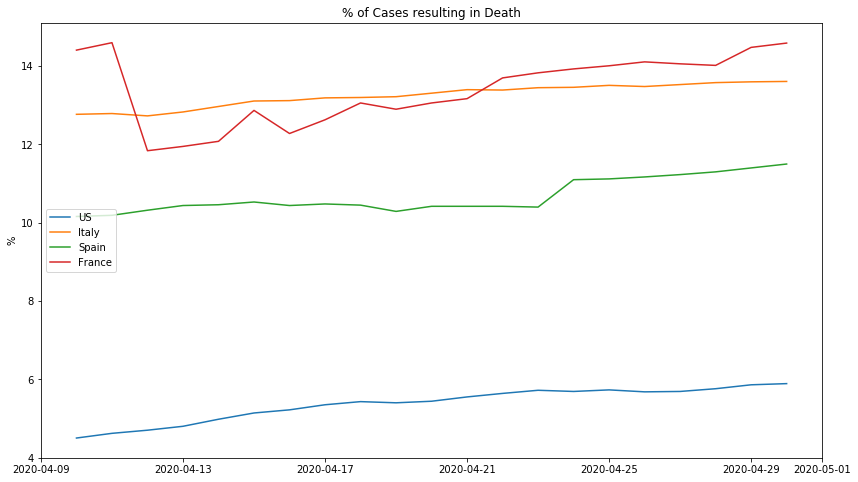

In [47]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-30 00:00:00 %
Country/Region,
Belgium,15.65
United Kingdom,15.56
France,14.59
Italy,13.61
Sweden,12.26
Netherlands,12.18
Spain,11.50
Liberia,11.35
Hungary,11.24


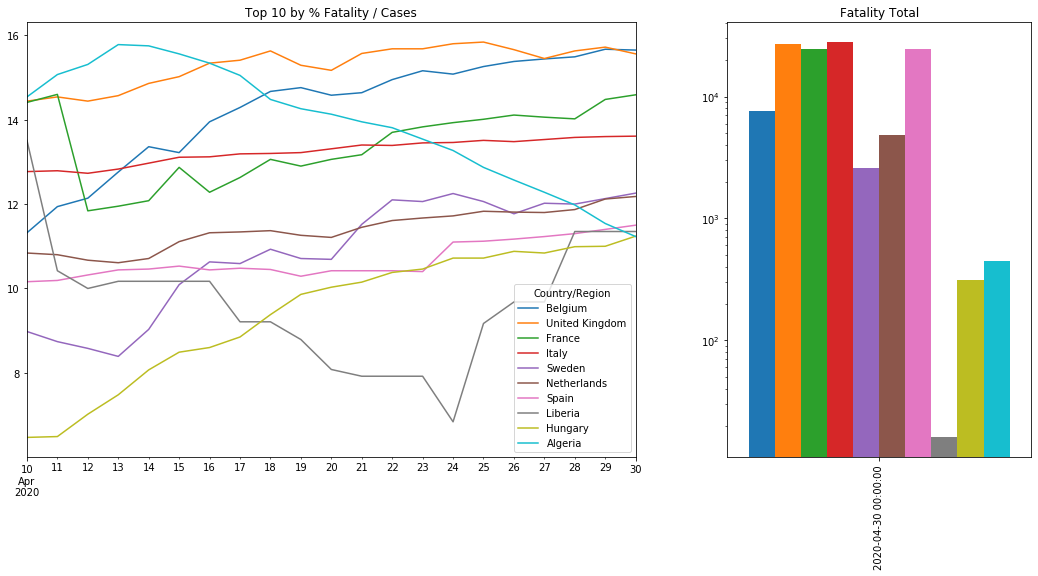

In [48]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [49]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-26,2878.479980,2854.649902,2887.719971,2852.889893,965785,90481,197675,207634,83912,13441,2855629
2020-04-27,2878.479980,2854.649902,2887.719971,2852.889893,988197,91472,199414,209465,83918,14153,2921517
2020-04-28,2863.389893,2909.959961,2921.149902,2860.709961,1012582,92584,201505,210773,83940,13736,2991982
2020-04-29,2939.510010,2918.459961,2954.860107,2912.159912,1039909,93657,203591,212917,83944,13895,3063140
2020-04-30,2912.429932,2930.909912,2930.909912,2892.469971,1069424,94640,205463,213435,83956,14088,3145899


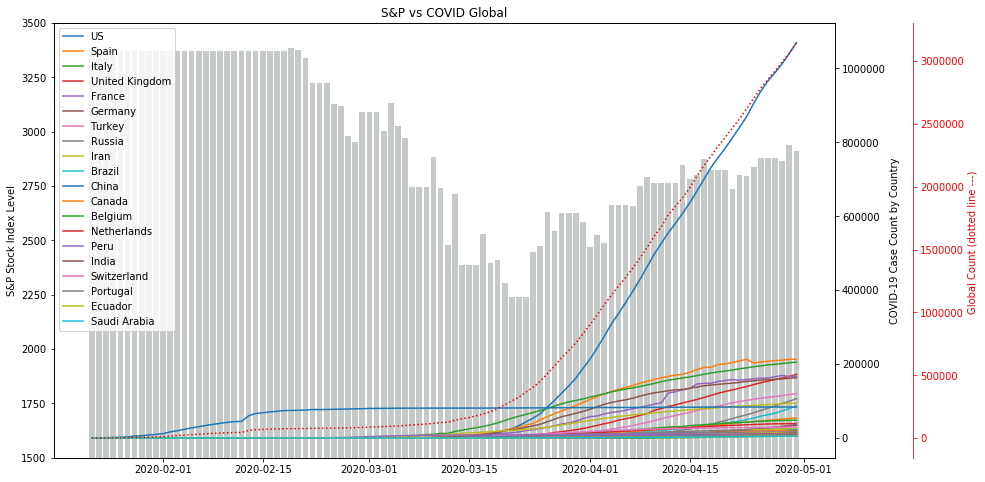

In [70]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.tick_params(axis='y', colors='red')
ax3.set_ylabel('Global Count (dotted line ---) ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

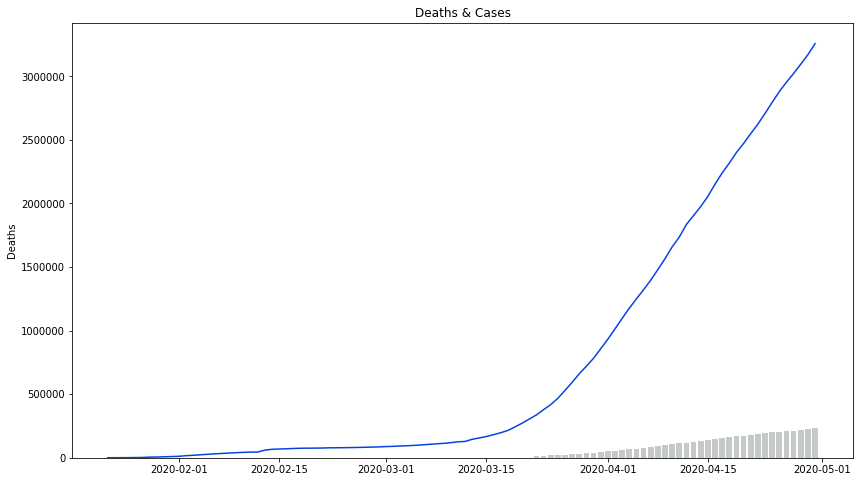

In [51]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [52]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])
display('top countries d', dfd_g2.sort_values(by=[dfd_g2.columns[-1]], ascending=False).head(3).iloc[:,-maxdays:])

'top countries'

,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
Country/Region,,,,,,,,,,
US,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424
Spain,204178,208389,213024,202990,205905,207634,209465,210773,212917,213435
Italy,183957,187327,189973,192994,195351,197675,199414,201505,203591,205463
United Kingdom,130172,134638,139246,144640,149569,154037,158348,162350,166441,172481
France,158168,155980,158303,159952,161644,162220,165963,169053,166543,167299
Germany,148291,150648,153129,154999,156513,157770,158758,159912,161539,163009
Turkey,95591,98674,101790,104912,107773,110130,112261,114653,117589,120204
Russia,52763,57999,62773,68622,74588,80949,87147,93558,99399,106498
Iran,84802,85996,87026,88194,89328,90481,91472,92584,93657,94640


'top countries d'

,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
Country/Region,,,,,,,,,,
US,45086,47412,49724,51493,53755,54881,56259,58355,60967,62996
Italy,24648,25085,25549,25969,26384,26644,26977,27359,27682,27967
United Kingdom,20264,21111,21840,22853,23697,24117,24458,25369,26166,26842


## Random analysis of various countries

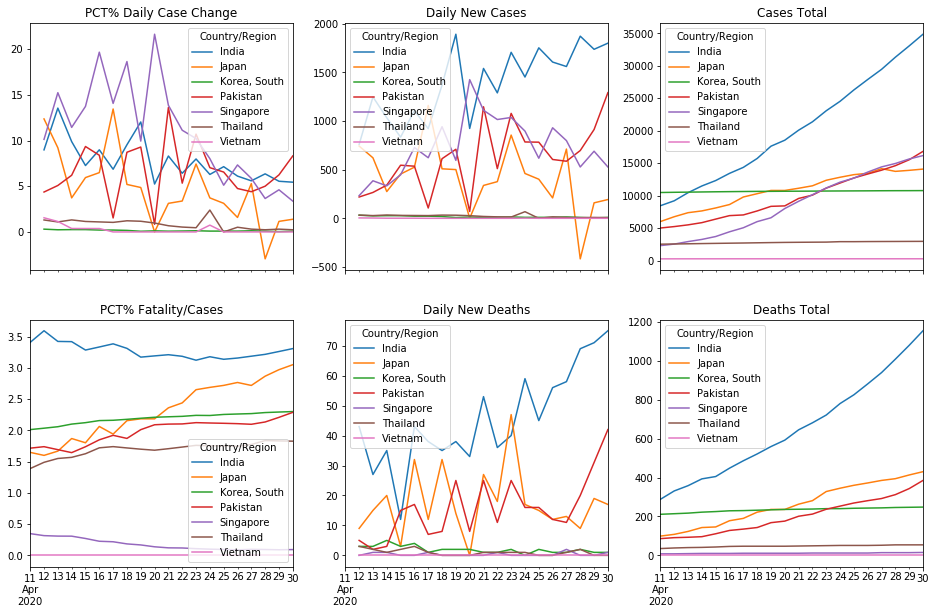

In [68]:
# ad hoc overlays
countries = ['Japan','Singapore','Thailand','Vietnam','India','Korea, South','Pakistan']
#countries = ['India','Pakistan','San Marino']
maxdays = 20

fig, axs = plt.subplots(2,3, figsize=(16, 10), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Daily Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Daily New Cases')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Cases Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality/Cases')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Daily New Deaths')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Deaths Total')
plt.show()

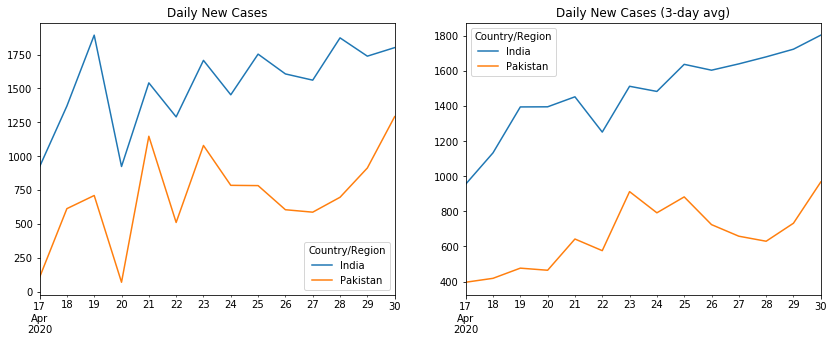

In [54]:
fig, axs = plt.subplots(1,2, figsize=(14,5), sharex=True)
dfc_g3[dfc_g3.index.isin(['India','Pakistan'])].diff(axis=1).transpose().tail(14).plot(ax=axs[0], title='Daily New Cases')
roll = dfc_g3[dfc_g3.index.isin(['India','Pakistan'])].diff(axis=1).transpose().rolling(3, axis=0).mean()
roll.tail(14).plot(ax=axs[1], title='Daily New Cases (3-day avg)')


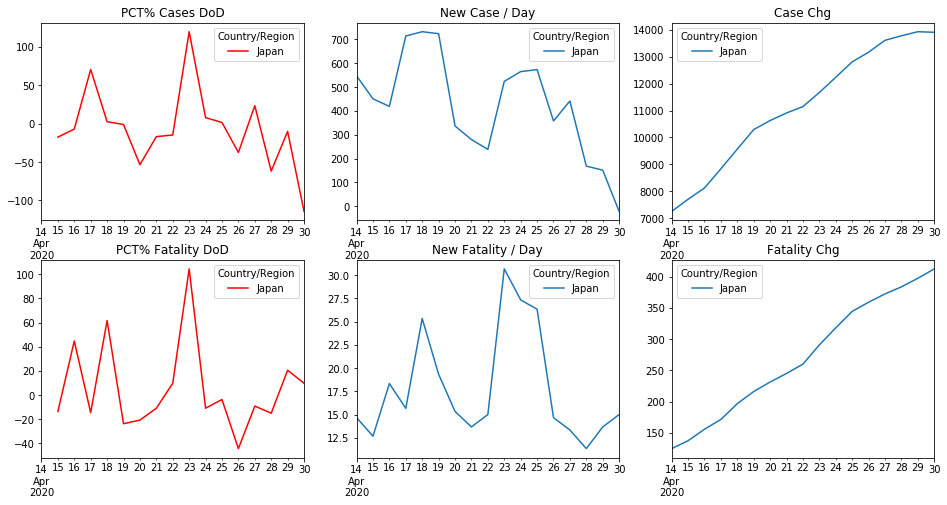

Country/Region,Japan
2020-04-26,-0.375800
2020-04-27,0.233924
2020-04-28,-0.618580
2020-04-29,-0.100990
2020-04-30,-1.143172


Country/Region,Japan
2020-04-26,-0.443038
2020-04-27,-0.090909
2020-04-28,-0.150000
2020-04-29,0.205882
2020-04-30,0.097561


In [55]:
# rolling 3 day to smooth out 
countries = ['Japan']
maxdays3 = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=False, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[0,2], title='Case Chg')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[1,2], title='Fatality Chg')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())


# Rival Countries

Country/Region,India,Poland,Japan,Pakistan
2020-04-26,27890,11617,13441,13328
2020-04-27,29451,11902,14153,13915
2020-04-28,31324,12218,13736,14612
2020-04-29,33062,12640,13895,15525
2020-04-30,34863,12877,14088,16817


Country/Region,India,Poland,Japan,Pakistan
2020-04-26,881,535,372,281
2020-04-27,939,562,385,292
2020-04-28,1008,596,394,312
2020-04-29,1079,624,413,343
2020-04-30,1154,644,430,385


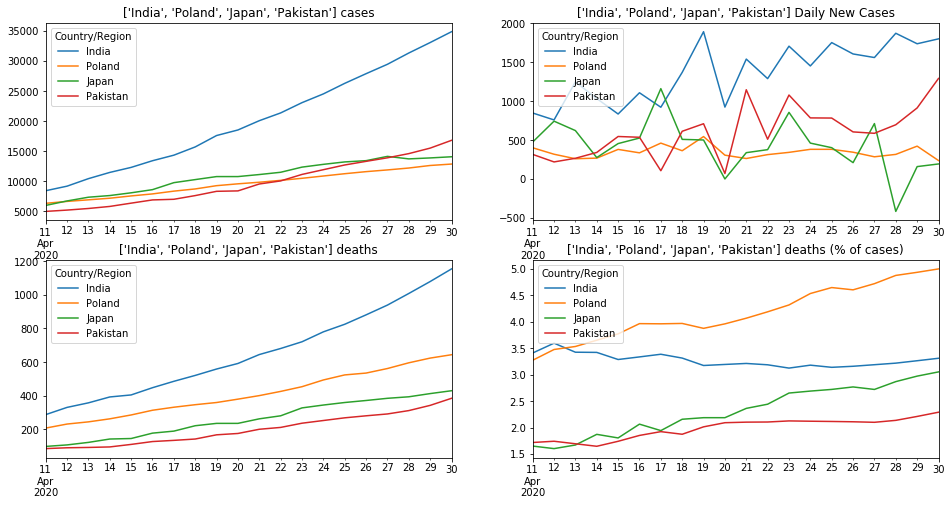

In [67]:
maxdays = 20
countries = ['India','Poland','Japan','Pakistan']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-26,46134,38040,3723
2020-04-27,46687,38440,3729
2020-04-28,47334,38612,3741
2020-04-29,47859,38998,3769
2020-04-30,48519,39512,3784


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-26,7094,4491,88
2020-04-27,7207,4534,88
2020-04-28,7331,4582,89
2020-04-29,7501,4727,89
2020-04-30,7594,4811,90


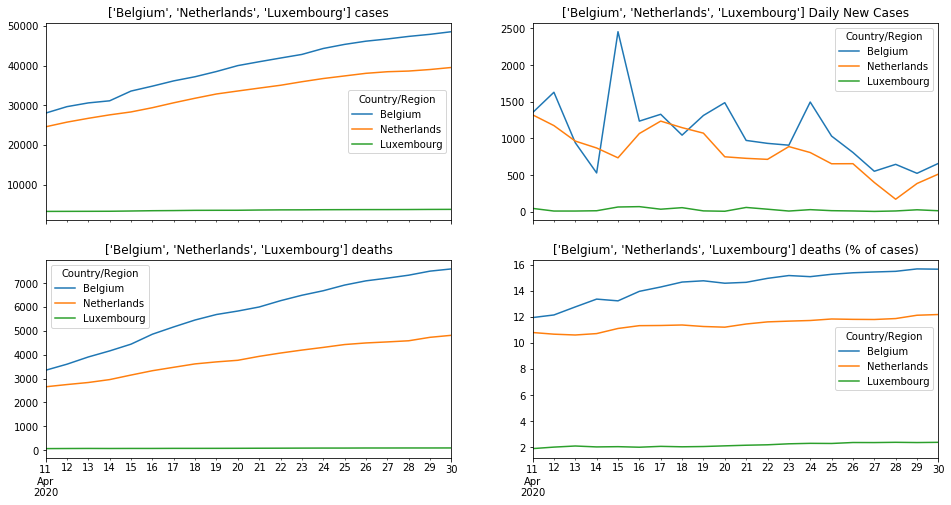

In [57]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-26,4576,7527,18640
2020-04-27,4695,7599,18926
2020-04-28,4740,7660,19621
2020-04-29,4906,7710,20302
2020-04-30,4995,7738,21092


Country/Region,Finland,Norway,Sweden
2020-04-26,190,201,2194
2020-04-27,193,205,2274
2020-04-28,199,206,2355
2020-04-29,206,207,2462
2020-04-30,211,210,2586


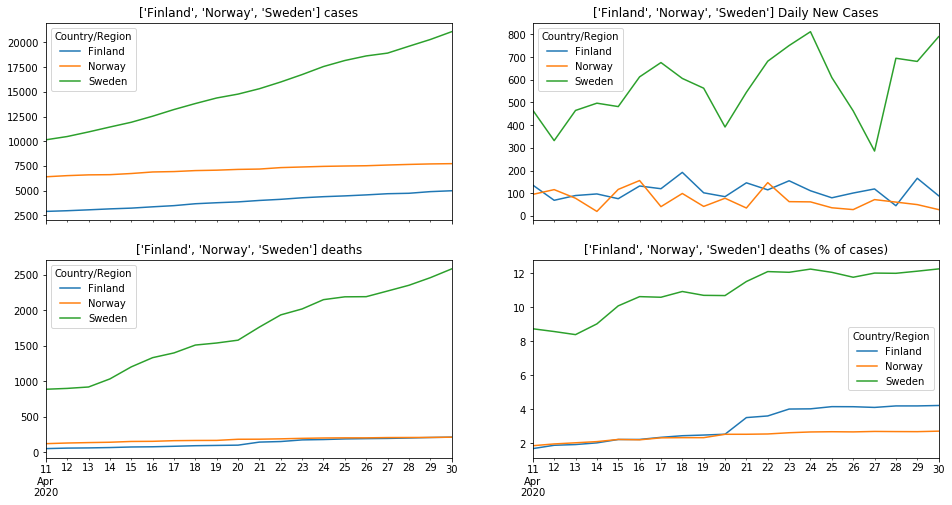

In [58]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


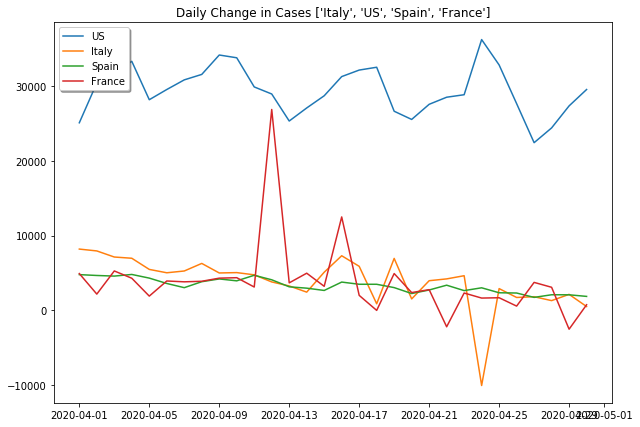

Country/Region,US,Spain,Italy,France
2020-04-26,27631.0,1729.0,2324.0,576.0
2020-04-27,22412.0,1831.0,1739.0,3743.0
2020-04-28,24385.0,1308.0,2091.0,3090.0
2020-04-29,27327.0,2144.0,2086.0,-2510.0
2020-04-30,29515.0,518.0,1872.0,756.0


In [59]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
Country/Region,,,,,,,,,,
US,785000.0,812181.0,840462.0,871626.0,904227.0,936432.0,964045.0,988855.0,1013563.0,1040638.0
Spain,201021.0,204259.0,208530.0,208134.0,207306.0,205510.0,207668.0,209291.0,211052.0,212375.0
Italy,181386.0,184171.0,187086.0,190098.0,192773.0,195340.0,197480.0,199531.0,201503.0,203520.0
France,155524.0,156514.0,157484.0,158078.0,159966.0,161272.0,163276.0,165745.0,167186.0,167632.0
United Kingdom,125733.0,130222.0,134685.0,139508.0,144485.0,149415.0,153985.0,158245.0,162380.0,167091.0
Germany,146847.0,148668.0,150689.0,152925.0,154880.0,156427.0,157680.0,158813.0,160070.0,161487.0
Turkey,90959.0,95082.0,98685.0,101792.0,104825.0,107605.0,110055.0,112348.0,114834.0,117482.0
Russia,47579.0,52628.0,57845.0,63131.0,68661.0,74720.0,80895.0,87218.0,93368.0,99818.0
Iran,83506.0,84768.0,85941.0,87072.0,88183.0,89334.0,90427.0,91512.0,92571.0,93627.0


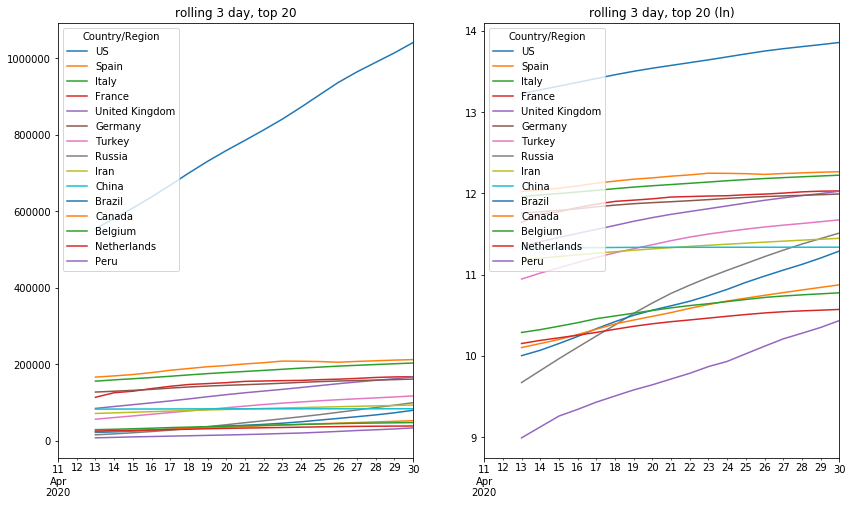

In [60]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [61]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.shape, df_gpop_2016.head(3), dfc_g.transpose().shape, dfc_g.tail(1).transpose().head(3))  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
df_gmerged = df_gmerged.rename(columns={df_gmerged.columns[1]:'Cases', 'Value':'Population'})
df_gmerged['% of pop'] = (df_gmerged['Cases'] / df_gmerged['Population']).mul(100).round(2)

dfd_gmerged = pd.merge(left=dfd_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
dfd_gmerged = dfd_gmerged.rename(columns={dfd_gmerged.columns[1]:'Deaths', 'Value':'Population'})
dfd_gmerged['% of pop'] = (dfd_gmerged['Deaths'] / dfd_gmerged['Population']).mul(100).round(2)

display(df_gmerged.shape, df_gmerged.sort_values(by=['% of pop'], ascending=False).head())
display(dfd_gmerged.shape, dfd_gmerged.sort_values(by=['% of pop'], ascending=False).head(10).drop(columns=['Country Code','Year']))


(262, 4)

,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,404024433
115,Caribbean small states,CSS,2016,7269386
174,Central Europe and the Baltics,CEB,2016,102994343


(187, 100)

,2020-04-30
Country/Region,
US,1069424
Spain,213435
Italy,205463


(289, 6)

,Country/Region,Cases,Country Code,Year,Population,% of pop
105,San Marino,569.0,SMR,2016.0,33504.0,1.70
94,Andorra,745.0,AND,2016.0,77297.0,0.96
56,Luxembourg,3784.0,LUX,2016.0,582014.0,0.65
72,Iceland,1797.0,ISL,2016.0,335439.0,0.54
30,Qatar,13409.0,QAT,2016.0,2654374.0,0.51


(289, 6)

,Country/Region,Deaths,Population,% of pop
74,San Marino,41.0,33504.0,0.12
5,Belgium,7594.0,11331422.0,0.07
1,Italy,27967.0,60627498.0,0.05
3,Spain,24543.0,46484062.0,0.05
72,Andorra,42.0,77297.0,0.05
4,France,24410.0,66721256.0,0.04
2,United Kingdom,26842.0,65611593.0,0.04
13,Sweden,2586.0,9923085.0,0.03
9,Netherlands,4811.0,17030314.0,0.03
16,Ireland,1232.0,4755335.0,0.03


C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

`item` has been deprecated and will be removed in a future version

C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning:

`item` has been deprecated and will be removed in a future version



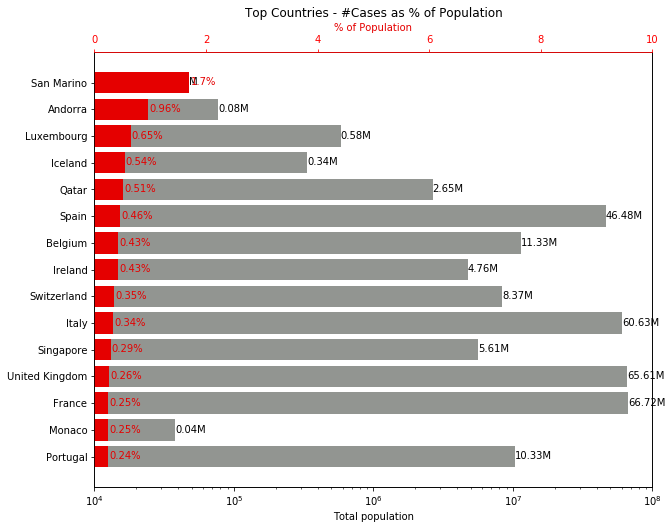

In [62]:
max_ctys = 15
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged.sort_values(by=['% of pop'],ascending=False).head(max_ctys)

ax1.set_xscale('log')
ax1.set(xlim=[10**4, 10**8])   # get max min +/- buffer
ax1.set_xlabel('Total population')  
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Population'], color='xkcd:grey')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['Population'].div(1000000).round(2).iloc[n:n+1].item()) + 'M', color='xkcd:black')

    
ax2 = ax1.twiny()
ax2.set_xscale('linear')
ax2.set(xlim=[0, 10])   # get max min +/- buffer
ax2.set_xlabel('% of Population', color='xkcd:red')  
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['% of pop'], color='xkcd:red')
for n,i in enumerate(ax2.patches):
    ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['% of pop'].iloc[n:n+1].item()) + '%', color='xkcd:red')
plt.title('Top Countries - #Cases as % of Population')
plt.gca().invert_yaxis()
plt.show()

# Emerging Markets (>100 cases)

In [72]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('countries with >10 % day over day case increases, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-8:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'countries with >10 % day over day case increases, > 100 cases'

,04-27,04-27 %chg,04-28,04-28 %chg,04-29,04-29 %chg,04-30,04-30 %chg
Country/Region,,,,,,,,
Maldives,226,6.0,250,11.0,278,11.0,468,68.0
Kosovo,510,0.0,510,0.0,510,0.0,799,57.0
Serbia,6630,0.0,6630,0.0,6630,0.0,9009,36.0
Ghana,1550,0.0,1671,8.0,1671,0.0,2074,24.0
Sierra Leone,93,0.0,104,12.0,104,0.0,124,19.0
Sudan,275,16.0,318,16.0,375,18.0,442,18.0
Congo (Kinshasa),459,4.0,471,3.0,491,4.0,572,16.0
Nigeria,1337,5.0,1532,15.0,1728,13.0,1932,12.0
Afghanistan,1703,11.0,1828,7.0,1939,6.0,2171,12.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,97,107,111,111,111,111,125,125,126,126
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,57,57,57,57,57,57,58,58,58,58
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,148,148,149,149,149,149,149,149,151,151
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,326,326,354,380,401,401,460,460,539,539
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,410,412,412,417,417,418,418,420,420,420
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,164,164,170,175,175,175,175,175,178,178
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,154715,157026,158636,160292,160847,164589,167605,165093,165764,165764


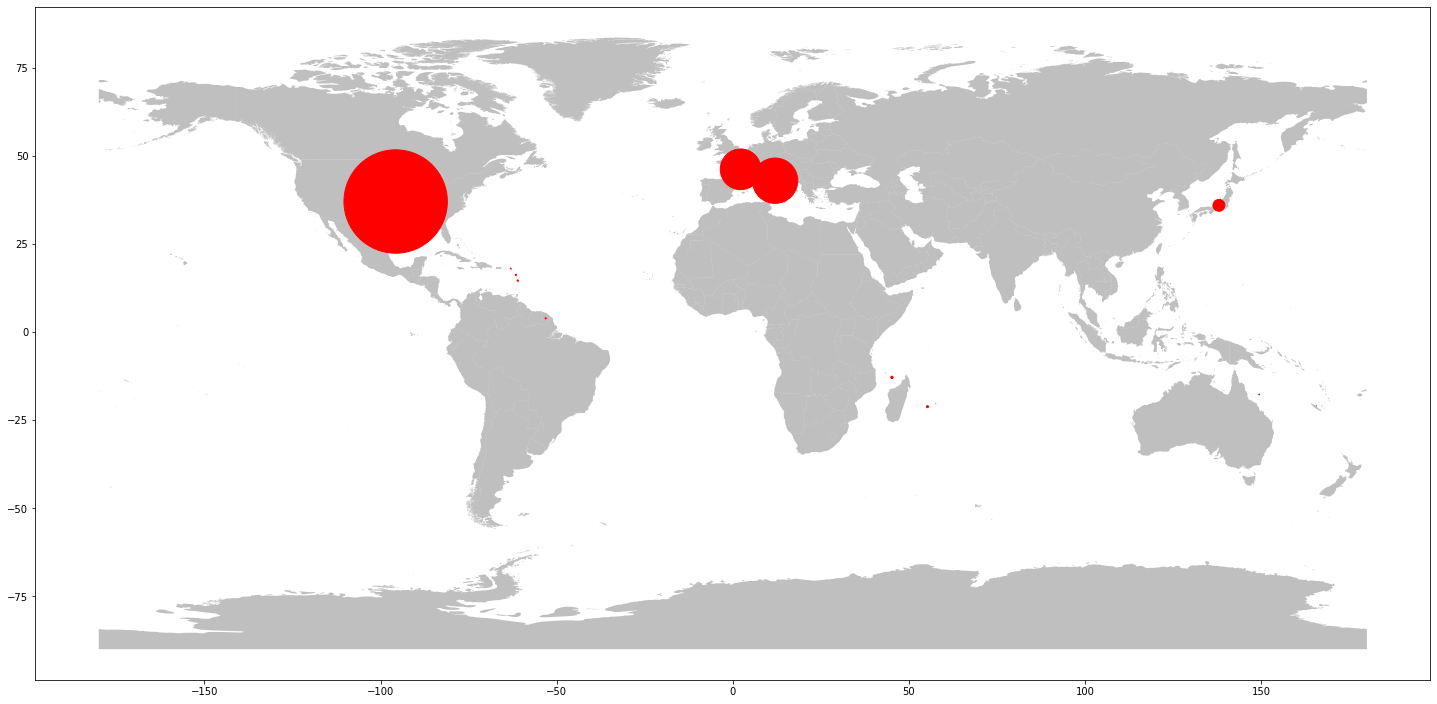

In [64]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last


In [65]:
from urllib.request import urlopen
import plotly.figure_factory as ff
import json

# https://plotly.com/python/builtin-colorscales/

def draw_choro(values, fips, title, legend, colorscale, min, max):    
    endpts = list(np.linspace(min, max, len(colorscale) - 1))

    fig = ff.create_choropleth(
        fips=fips, values=values, scope=['usa'],
        binning_endpoints=endpts, 
        colorscale=colorscale,
        show_state_data=False,
        show_hover=False,
        asp = 2.9,
        title_text = title,
        legend_title = legend
    )
    fig.update_layout(autosize=False,width=600, height=310)
    fig.layout.template = None
    fig.show()

df = df_merged_tmp[['countyFIPS','County Name','State']].copy()
df['countyFIPSstr'] = df['countyFIPS'].apply(lambda x: str(x) if x > 9999 else '0'+str(x))  # make 5char lpadded
fips = df['countyFIPSstr'].tolist()
display(df.shape)

## -- US cases
# http://www.perbang.dk/rgbgradient/ - color picker
colorscale = ['rgb(245,245,245)', 'rgb(254,224,210)', 'rgb(252,187,161)', 'rgb(252,146,114)', 'rgb(251,106,74)', 'rgb(239,59,44)', 'rgb(203,24,29)', 'rgb(165,15,21)', 'rgb(103,0,13)']
df['count'] = dfc[dfc.columns[-1]]  # n days ago
df['countLog'] = df['count'].apply(lambda x: round(np.log(x),1) if x != 0 else 0)
values = df['countLog'].tolist()
draw_choro(values, fips, 'COVID Cases Today', '#Cases (LN)', colorscale, 1, 12)


NameError: name 'df_merged_tmp' is not defined